In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import math
from numpy import linalg as LA
from numpy.linalg import matrix_rank

In [2]:
#Establecer directorio de datos

DIR='/Users/alex/Desktop'
FILE='/adjmatrix.tsv'

file='{}{}'.format(DIR,FILE)

print('File directory:{}'.format(file))

File directory:/Users/alex/Desktop/adjmatrix.tsv


In [3]:
data=pd.read_table(file)
a=np.diag(np.ones(16438),0)
A=data-a

In [4]:
# Función convertir a lista el resultado de aplicar .mean() a un DataFrame

def mean_to_list(df):
    arr=[]
    for i in range(0,len(df)):
        a=df.iloc[i]
        arr.append(a)
    return arr

# Función para calcular el promedio de las entradas de una lista 

def cal_prom_en_list(num):
    sum_num=0
    for entrada in num:
        sum_num=sum_num +entrada
        
    prom = sum_num/len(num)
    return prom

# Cálculo del umbral, promediando sobre todas las entradas de la matriz de adyacencia

A_prom_cols=A.mean()
A_mean_list=mean_to_list(A_prom_cols)
cal_prom_en_list(A_mean_list)
threshold=cal_prom_en_list(A_mean_list)

In [5]:
# Función para dibujar el grafo asociado a la matriz "mat" en formato de DataFrame
# y a las dimensiones de una submatriz de ests de nxn donde "n" es el segundo parámetro 
# de la función.

def plt_adj_graph(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    adj_to_graph=nx.from_numpy_matrix(simm_mat)
    Graph=nx.draw(adj_to_graph)
    
    return Graph

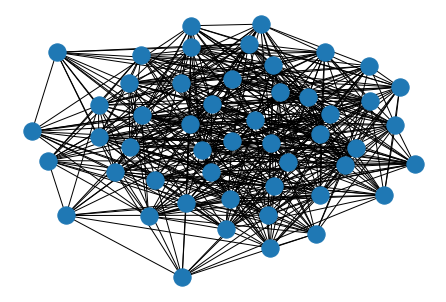

In [8]:
plt_adj_graph(A,50)

In [9]:
from sympy.abc import x,y

In [12]:
e=x+y+x

print(e) 

2*x + y


In [24]:
import sympy as sp
from sympy import Symbol,Poly
a=Symbol("a")
x=Symbol("x")
expr=3+x+x**2+a*x*2
expr.coeff(x)

2*a + 1

In [22]:
expr

2*a*x + x**2 + x + 3

In [28]:
b=Poly(expr,x)
b.coeffs()

[1, 2*a + 1, 3]

In [39]:
M=sp.Matrix([[1,2],[2,4]])

lamda=Symbol("lamda")
p=M.charpoly(lamda)
print(p)
print(p.coeffs())

PurePoly(lamda**2 - 5*lamda, lamda, domain='ZZ')
[1, -5]


In [40]:
type(M)

sympy.matrices.dense.MutableDenseMatrix

In [44]:
#Primero obtenemos una submatriz DataSet del DataFrame original
data_for_pChar=A.iloc[:3,:3]
type(data_for_pChar)

data_mod=np.matrix(data_for_pChar)
data_modx2=sp.Matrix(data_mod)

lamda=Symbol("lamda")
pol=data_modx2.charpoly(lamda)

print(pol)
print(pol.coeffs())

PurePoly(nan*lamda**3 + nan*lamda**2 + nan*lamda + nan, lamda, domain='ZZ[nan]')
[nan, nan, nan, nan]


In [49]:
#Función para obtener el polinomio característico de una matriz
# asociada a un data set 

def pol_char(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    
    data_modx2=sp.Matrix(simm_mat)
    
    lamda=Symbol("lamda")
    pol=data_modx2.charpoly(lamda)


    
    return print(pol),print(pol.coeffs())

In [52]:
#Función para ver qué forma tiene la matriz del data set que estamos
#estudiando 

def mat_shape(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    
    return simm_mat

In [55]:
mat_shape(A,3)

matrix([[0., 0., 1.],
        [0., 0., 1.],
        [1., 1., 0.]])

In [56]:
pol_char(A,3)

PurePoly(1.0*lamda**3 - 2.0*lamda, lamda, domain='RR')
[1.00000000000000, -2.00000000000000]


(None, None)

In [ ]:
# Función para calcular número de aristasi8

Para mañana debo revisar el artículo de Terence Tao sobre valores propios y tratar de aplicarlo para crear un script que los calcule de forma eficiente los valores propios